<a href="https://colab.research.google.com/github/GonzaloGut/Examen_Python2/blob/main/ExamenFinal_Gonzalo_Gutierrez_Final(Revisar%20este).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Problema 1

In [94]:
"""
Establezca 2 modelos de clasificación para el data Iirs
"""
import numpy as np
import pandas as pd
from sklearn import neighbors,datasets
from sklearn.model_selection import train_test_split as tts
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.metrics import recall_score, precision_score, confusion_matrix
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import plotly.express as px

#Traemos la data Iris
df_iris = px.data.iris()    
df_iris.head()

#Extraemos X, y
x1 = np.array(df_iris['sepal_length'])
x2 = np.array(df_iris['sepal_width'])
X = np.c_[x1,x2]
y = np.array(df_iris['species_id'])
y = np.reshape(y,(len(y),1))
print(np.shape(X))
print(np.shape(y))

#Separación a train y test
Xtrain,Xtest,ytrain,ytest = tts(X,y,test_size = 0.20, random_state = 42)

(150, 2)
(150, 1)


In [95]:
#Creamos el modelo            ->     MODELO 1 : (Modelo KNN)
modeloKNN = knn(n_neighbors=5)
modeloKNN.fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

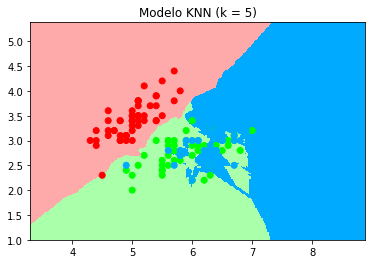

In [105]:
# Graficamos
# Creamos los mapas de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# Calculamos min, max y los límites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
np.arange(y_min, y_max, .02))

# predecimos
Z = modeloKNN.predict(np.c_[xx.ravel(), yy.ravel()])

# Ponemos el resultado en un plor de color
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Hacemos el plot de train
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Modelo KNN (k = 5)")
plt.show()

In [100]:
#Creamos el modelo            ->     MODELO 2 : (Modelo Regresor Logístico)
from sklearn.linear_model import LogisticRegression
modeloLogistico = LogisticRegression(max_iter=60)
modeloLogistico.fit(Xtrain,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(max_iter=60)

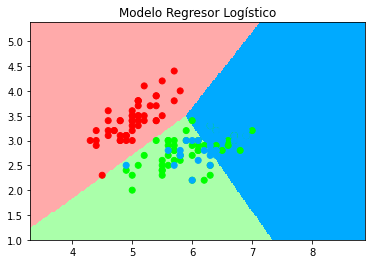

In [104]:
# Graficamos
# Creamos los mapas de colores
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA','#00AAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00','#00AAFF'])

# Calculamos min, max y los límites
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02),
np.arange(y_min, y_max, .02))

# predecimos
Z2 = modeloLogistico.predict(np.c_[xx.ravel(), yy.ravel()])

# Ponemos el resultado en un plor de color
Z2 = Z2.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z2, cmap=cmap_light)

# Hacemos el plot de train
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Modelo Regresor Logístico")
plt.show()

#Problema 2

In [ ]:
"""
Evalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses
"""


'\nEvalúa 2 modelos: Uno con PCA y otro sin PCA para el modelo de clasificación del dataset melbournhouses\n'

#Problema 3

In [173]:
"""
¿Existe sobreajuste al aplicar un modelo de RF con n = 200 para el modelo de wine.csv? 
"""
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score, mean_squared_error

#Traemos la data
df_wine = pd.read_excel('/content/wine.xlsx')
df_wine.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [175]:
#Extraemos X, y
x1 = np.array(df_wine['points'])
x2 = np.array(df_wine['price'])
X = np.c_[x1,x2]
y = np.array(df_wine['country'])
y = np.reshape(y,(len(y),1))
print(np.shape(X))
print(np.shape(y))

(150930, 2)
(150930, 1)


In [176]:
#Procesamiento de datos
from sklearn.preprocessing import LabelEncoder
LabelEncoder.fit(y)
ycod = LabelEncoder.fit_transform(y)


y=np.array(df_wine['price'])
y=np.reshape(y,(150930,1))
print(y)



from sklearn.preprocessing import MinMaxScaler
Xgenerado = np.array(y)
X_scal = MinMaxScaler.fit_transform(Xgenerado)
print(X_scal)


from sklearn.cluster import KMeans
inercia =[]
for i in range(1,11):
  k_means = KMeans(n_clusters = i)
  k_means.fit(y)
  inercia.append(k_means.inertia_)
#Visualizar el codo de Jambu
plt.plot(range(1,11),inercia)



k_means2 = KMeans(n_clusters = 2) #Hay un codo en k=2
k_means2.fit(y)
labels = k_means2.labels_


TypeError: ignored

In [140]:
#Creamos el modelo
Xtrain,Xtest,ytrain,ytest=tts(X,y,test_size=0.3,random_state=44)

modeloRFR = RFR(random_state = 200)
modeloRFR.fit(Xtrain,ytrain)

#Verificamos si hay sobreajuste

ytestpred =modeloRFR.predict(Xtest)   #para Test
r2Test = r2_score(ytest, ytestpred)
print('En Test, el coeficiente de determinación es:', r2Test)

ytrainpred =modeloRFR.predict(Xtrain)   #para Train
r2Train = r2_score(ytrain, ytrainpred)
print('En Train, el coeficiente de determinación es:', r2Train)

ValueError: ignored

In [ ]:
from locale import NOEXPR
# Como      , entonces hay sobreajuste
NO
EXPRpoca diferencia


#Problema 4

In [169]:
"""
Puedes graficar un modelo de deep leraning para la dataset de breast-cancer
"""
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler


#Traemos la data 
df_cancer = pd.read_csv('https://raw.githubusercontent.com/pedrorotta/PythonIntermedio2022/main/Examen/breast-cancer.csv')
df_cancer.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [170]:
#Extraemos X, y
X = df_cancer.drop(columns = ['id','diagnosis'])
y = np.array(df_cancer['diagnosis'])

#Procesamiento de datos: y
y = LabelEncoder().fit_transform(y)
y = np.reshape(y,(len(y),1))
print(np.shape(y))

#Procesamiento de datos: X
escalar = MinMaxScaler()
X = np.array(X)
X = escalar.fit_transform(X)

#Creamos el modelo y compilamos
Xtrain,Xtest,ytrain,ytest = tts(X,y)
modelo1 = tf.keras.Sequential([
      tf.keras.Input(shape = (30,)),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(60,activation = 'relu'),
      tf.keras.layers.Dense(30,activation = 'relu'),
      tf.keras.layers.Dense(10,activation = 'relu'),
      tf.keras.layers.Dense(4,activation = 'relu'),
      tf.keras.layers.Dense(2,activation = 'relu'),
      tf.keras.layers.Dense(1,activation = 'sigmoid')
])
modelo1.compile(loss = tf.keras.losses.binary_crossentropy,optimizer = tf.keras.optimizers.SGD(),
                           metrics = 'accuracy')

grafica1 = modelo1.fit(Xtrain,ytrain,epochs = 800)


(569, 1)
Epoch 1/800
14/14 [==============================] - 1s 2ms/step - loss: 0.6923 - accuracy: 0.5845
Epoch 2/800
14/14 [==============================] - 0s 2ms/step - loss: 0.6904 - accuracy: 0.6127
Epoch 3/800
14/14 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.6127
Epoch 4/800
14/14 [==============================] - 0s 2ms/step - loss: 0.6877 - accuracy: 0.6127
Epoch 5/800
14/14 [==============================] - 0s 2ms/step - loss: 0.6863 - accuracy: 0.6127
Epoch 6/800
14/14 [==============================] - 0s 2ms/step - loss: 0.6852 - accuracy: 0.6127
Epoch 7/800
14/14 [==============================] - 0s 2ms/step - loss: 0.6839 - accuracy: 0.6127
Epoch 8/800
14/14 [==============================] - 0s 2ms/step - loss: 0.6827 - accuracy: 0.6127
Epoch 9/800
14/14 [==============================] - 0s 2ms/step - loss: 0.6816 - accuracy: 0.6127
Epoch 10/800
14/14 [==============================] - 0s 3ms/step - loss: 0.6806 - accuracy: 0.6127


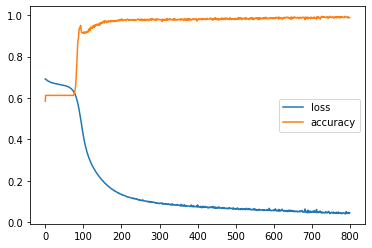

In [171]:
#La gráfica de Funcion de Costo
pd.DataFrame(grafica1.history).plot()

#Problema 5

In [166]:
"""
Crea una función que aplane la ruta de una imágen
"""
#Importamos
from PIL import Image
import matplotlib.pyplot as plt

#Creamos la funcion
def AplanadorImagenes (ruta):
  img1 = plt.imread(ruta)
  #Para convertirlo a vector
  img1_vector = img1.flatten()  
  return img1_vector

#Probamos la funcion con un ejemplo y vemos su dimensión
ruta = '/content/Tecnoesfera_Por_dentro.jpg'
foto = AplanadorImagenes(ruta)

print(foto.shape)

(561000,)
